# Importing Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Dataset

In [3]:
df = pd.read_csv("Laptop_data.csv")
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15


# Data Cleaning

In [4]:
df.isnull().sum()

brand               0
model               0
processor_brand     0
processor_name      1
processor_gnrtn     0
ram_gb             25
ram_type           25
ssd                 0
hdd                 0
os                  0
os_bit              0
graphic_card_gb     0
weight              0
display_size        0
warranty            0
Touchscreen         0
msoffice            0
latest_price        0
old_price           0
discount            0
star_rating         0
ratings             0
reviews             0
dtype: int64

In [5]:
df.shape

(896, 23)

In [6]:
df.ram_gb.value_counts()

8                503
16               239
4                102
32                12
15.6               6
NVIDIA             2
5                  1
Dual               1
Acer               1
Pre-installed      1
Full               1
Intel              1
Access             1
Name: ram_gb, dtype: int64

In [7]:
df.ram_gb.unique()

array(['4', '8', '16', '5', nan, '32', '15.6', 'Dual', 'NVIDIA', 'Acer',
       'Pre-installed', 'Full', 'Intel', 'Access'], dtype=object)

In [8]:
df[df.ram_gb == '5']

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
21,acer,Aspire,Intel,i5,Missing,5,DDR5,0,0,Missing,...,0,0,No,No,50990,89999,43,4.4,10966,1185


Computers Dont have 5 gb Ram 

It must be 4gb 

similarly making 15.6 gb to 16gb


In [9]:
df.at[21,'ram_gb']= '4'

In [10]:
df.loc[df.ram_gb=='15.6',['ram_gb']] = ['16']

In [11]:
df.ram_gb.value_counts()

8                503
16               245
4                103
32                12
NVIDIA             2
Dual               1
Acer               1
Pre-installed      1
Full               1
Intel              1
Access             1
Name: ram_gb, dtype: int64

converting all other non realted type of ram capacity to the mode capacity i.e 8.

In [12]:
df.loc[df['ram_gb'].isin(['NVIDIA', 'Dual','Acer', 'Pre-installed','Full','Intel','Access']),['ram_gb']] = ['8']

In [13]:
df.ram_gb.value_counts()

8     511
16    245
4     103
32     12
Name: ram_gb, dtype: int64

In [14]:
df.ram_gb.fillna(value = '8',inplace=True)

In [15]:
df.ram_gb = df.ram_gb.astype(int)

In [16]:
df.ram_gb.unique()

array([ 4,  8, 16, 32])

In [17]:
df.ram_type.value_counts()

DDR4       741
LPDDR4X     65
LPDDR3      14
LPDDR4      12
DDR3        12
DDR5         7
Unified      6
Full         6
GTX          2
Cooling      1
Master       1
Windows      1
LED          1
i5           1
Apps         1
Name: ram_type, dtype: int64

In [18]:
df.loc[df.ram_type.isin(['DDR4','LPDDR4X','LPDDR4']), ['ram_type']] = [4]

In [19]:
df.loc[df.ram_type.isin(['DDR3','LPDDR3']), ['ram_type']] = [3]

In [20]:
df.loc[df.ram_type.isin(['DDR5']), ['ram_type']] = [5]

Converting the outliers Ramtype to ddr4 type ram (mode)

In [21]:
df.loc[df.ram_type.isin(['Unified','Full','GTX','Cooling','Master','Windows','LED','i5','Apps']), ['ram_type']] = [4]

In [22]:
df.ram_type.value_counts()

4    838
3     26
5      7
Name: ram_type, dtype: int64

In [23]:
df.rename(columns={'ram_type':'Ram_DDR'}, inplace=True)

In [24]:
df.processor_brand.value_counts()

Intel            645
AMD              208
Apple             24
NVIDIA             7
MediaTek           3
Pre-installed      3
First              2
Qualcomm           1
512                1
M.2                1
64                 1
Name: processor_brand, dtype: int64

We dont have any brand named Preinstalled, First, 512, M.2 or 64

so marking it as Others

In [25]:
df.loc[df.processor_brand.isin(['Pre-installed','First','512','M.2','64']), ['processor_brand']] = ['Others']

In [26]:
df.brand.value_counts()

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
LG             5
Vaio           5
realme         4
Nokia          4
Infinix        4
ALIENWARE      4
Smartron       3
lenovo         3
MICROSOFT      3
RedmiBook      3
Mi             2
SAMSUNG        1
iball          1
Name: brand, dtype: int64

ALL this brands exists. Therefore no changes should be made in it...

In [27]:
df.os.value_counts()

Windows    796
Missing     72
Mac         28
Name: os, dtype: int64

In [28]:
df[df.os=='Missing'].brand.value_counts()

ASUS         16
HP           14
acer         11
Lenovo       11
MSI           8
DELL          5
ALIENWARE     4
lenovo        3
Name: brand, dtype: int64

Since all the laptops with os parameter as missing doesnt belong to Apple Company, the must be running Windows as other os are not widely used by these competitors in commercial market.

In [29]:
df[df.os=='Missing']['os'] = 'Windows'

/var/folders/bd/0d2v_7mn4wl3rxllb0m23s2r0000gn/T/ipykernel_20172/3982954932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.os=='Missing']['os'] = 'Windows'


In [30]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'Ram_DDR', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [31]:
df.loc[df['os'].isin(['Missing']), ['os']] = ['Windows']

In [32]:
df[df.star_rating == 0]['ratings'].value_counts()

0    264
Name: ratings, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

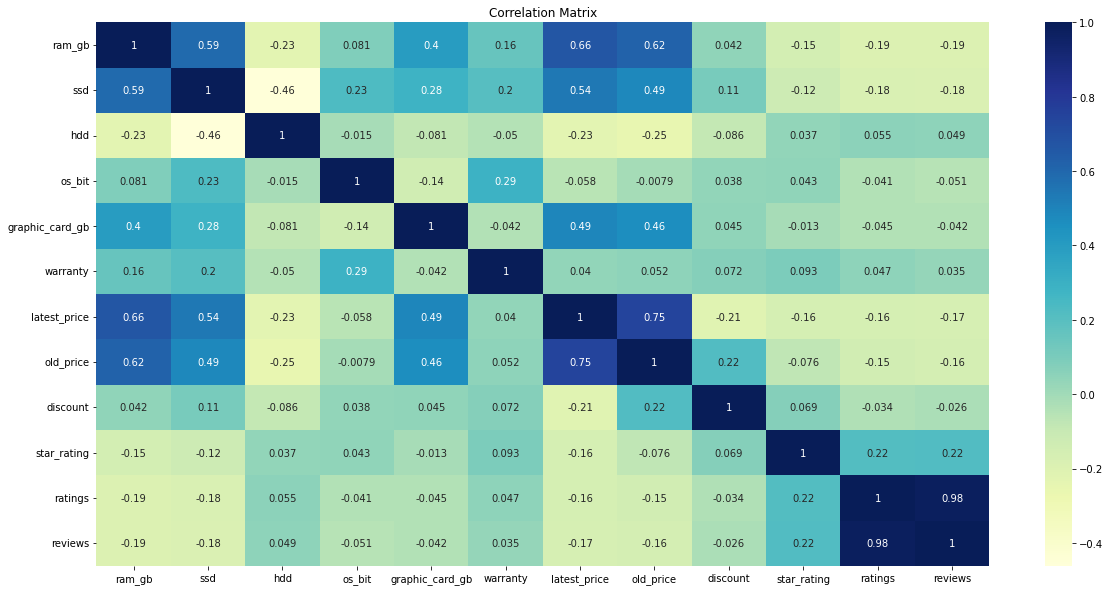

In [33]:
import seaborn as sn

plt.rcParams["figure.figsize"] = (20, 10)
sn.heatmap(df.corr(),cmap="YlGnBu", annot=True)

plt.title("Correlation Matrix")

In [34]:
df_final = df.drop(['model','processor_name','processor_gnrtn'],axis='columns')

In [35]:
df_final.describe()

,ram_gb,ssd,hdd,os_bit,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,10.049107,431.750000,190.857143,59.178571,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,4.783332,316.436824,401.181158,11.453644,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,4.000000,0.000000,0.000000,32.000000,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,256.000000,0.000000,64.000000,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,64.000000,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,16.000000,512.000000,0.000000,64.000000,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,32.000000,3072.000000,2048.000000,64.000000,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   processor_brand  896 non-null    object 
 2   ram_gb           896 non-null    int64  
 3   Ram_DDR          871 non-null    object 
 4   ssd              896 non-null    int64  
 5   hdd              896 non-null    int64  
 6   os               896 non-null    object 
 7   os_bit           896 non-null    int64  
 8   graphic_card_gb  896 non-null    int64  
 9   weight           896 non-null    object 
 10  display_size     896 non-null    object 
 11  warranty         896 non-null    int64  
 12  Touchscreen      896 non-null    object 
 13  msoffice         896 non-null    object 
 14  latest_price     896 non-null    int64  
 15  old_price        896 non-null    int64  
 16  discount         896 non-null    int64  
 17  star_rating     

In [37]:
df_final.star_rating = df_final.star_rating.astype(int)

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            896 non-null    object
 1   processor_brand  896 non-null    object
 2   ram_gb           896 non-null    int64 
 3   Ram_DDR          871 non-null    object
 4   ssd              896 non-null    int64 
 5   hdd              896 non-null    int64 
 6   os               896 non-null    object
 7   os_bit           896 non-null    int64 
 8   graphic_card_gb  896 non-null    int64 
 9   weight           896 non-null    object
 10  display_size     896 non-null    object
 11  warranty         896 non-null    int64 
 12  Touchscreen      896 non-null    object
 13  msoffice         896 non-null    object
 14  latest_price     896 non-null    int64 
 15  old_price        896 non-null    int64 
 16  discount         896 non-null    int64 
 17  star_rating      896 non-null    in

# Making X and Y from the final dataset..

In [39]:
x = df_final.drop('latest_price',axis='columns')
y = df_final.latest_price

In [40]:
dummy_df = pd.get_dummies(df_final,columns=['brand','processor_brand','ram_gb','os','os_bit','weight','display_size','Touchscreen','msoffice'])

In [41]:
dummy_df.Ram_DDR.fillna(value=4,inplace=True)

In [42]:
x = dummy_df

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()

In [44]:
y = y.values.reshape(-1,1)
scaler_1.fit_transform(y)
y = pd.DataFrame(y)
y

,0
0,23990
1,37990
2,32890
3,42990
4,54990
...,...
891,46390
892,40390
893,76012
894,33990


# Finding the Best Model to Train

In [45]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
            }
        },
        'SVM':{
            'model':SVR(),
            'params' :{
            }
        },

        'Random_forest':{
            'model':RandomForestRegressor(),
            'params':{
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {

            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        print(algo_name)
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

linear_regression
lasso
SVM


/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWar

Random_forest


/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib

decision_tree


,model,best_score,best_params
0,linear_regression,1.000000,{}
1,lasso,1.000000,{}
2,SVM,-0.077417,{}
3,Random_forest,0.966876,{}
4,decision_tree,0.968652,{}


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

model1 = LinearRegression()
model2 = Lasso()
 
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)


Lasso()

In [47]:
from sklearn.metrics import mean_squared_error

y_pred_mse1 = model1.predict(x)

y_pred_mse2 = model2.predict(x)

print("The root mean squared error for Linear Regression is: ", mean_squared_error(y,y_pred_mse1, squared=False))
print("The root mean squared error for Lasso Regression is: ", mean_squared_error(y,y_pred_mse2, squared=False))

The root mean squared error for Linear Regression is:  4.4135433465080467e-11
The root mean squared error for Lasso Regression is:  0.027236603290011797


In [48]:
print("The mean squared error for Linear Regression is: ", mean_squared_error(y,y_pred_mse1))
print("The mean squared error for Lasso Regression is:", mean_squared_error(y,y_pred_mse2))

The mean squared error for Linear Regression is:  1.947936487150545e-21
The mean squared error for Lasso Regression is: 0.0007418325587774814


In [49]:
from sklearn.metrics import mean_absolute_error
print("The root mean absolute error for Linear Regression is:  ", mean_absolute_error(y,y_pred_mse1))
print("The root mean absolute error for Lasso Regression is: ", mean_absolute_error(y,y_pred_mse2))

The root mean absolute error for Linear Regression is:   3.204750750488269e-11
The root mean absolute error for Lasso Regression is:  0.0094900214245521


### Therefore Linear Regression Model is the better one.

In [50]:
model = model1

In [51]:
import pickle
with open('Laptop_Price_prediction.pickle','wb') as f:
    pickle.dump(model,f)